In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#### Multivariate A/B Testing

In [7]:
def analyze_multivariate_test(data):
    """
    Analyze multivariate test results.
    
    Parameters:
    - data: DataFrame with columns for variant, visitors, and conversions
    
    Returns:
    - DataFrame with analysis results
    """
    results = []
    
    # Calculate conversion rate for each variant
    data['conversion_rate'] = data['conversions'] / data['visitors']
    
    # Select baseline variant (usually the first one)
    baseline = data.iloc[0]
    
    for _, variant in data.iterrows():
        # Skip if this is the baseline
        if variant.name == baseline.name:
            p_value = 1.0
            z_score = 0.0
            relative_uplift = 0.0
            ci_lower = 0.0
            ci_upper = 0.0
        else:
            # Standard errors
            se_baseline = np.sqrt(baseline['conversion_rate'] * 
                               (1 - baseline['conversion_rate']) / 
                               baseline['visitors'])
            
            se_variant = np.sqrt(variant['conversion_rate'] * 
                              (1 - variant['conversion_rate']) / 
                              variant['visitors'])
            
            # Z-score
            se_diff = np.sqrt(se_baseline**2 + se_variant**2)
            z_score = (variant['conversion_rate'] - baseline['conversion_rate']) / se_diff
            
            # P-value
            p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
            
            # Relative uplift
            relative_uplift = ((variant['conversion_rate'] - baseline['conversion_rate']) / 
                            baseline['conversion_rate'])
            
            # 95% Confidence interval
            ci_lower = relative_uplift - 1.96 * se_diff / baseline['conversion_rate']
            ci_upper = relative_uplift + 1.96 * se_diff / baseline['conversion_rate']
        
        results.append({
            'variant': variant['variant'],
            'visitors': variant['visitors'],
            'conversions': variant['conversions'],
            'conversion_rate': variant['conversion_rate'],
            'z_score': z_score,
            'p_value': p_value,
            'relative_uplift': relative_uplift,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'is_significant': p_value < 0.05
        })
    
    return pd.DataFrame(results)


Multivariate Test Results:
     variant  conversion_rate  relative_uplift       p_value  is_significant
0  Variant 1            0.062         0.000000  1.000000e+00           False
1  Variant 2            0.095         0.532258  5.982300e-03            True
2  Variant 3            0.007        -0.887097  9.341417e-12            True
3  Variant 4            0.025        -0.596774  4.645115e-05            True


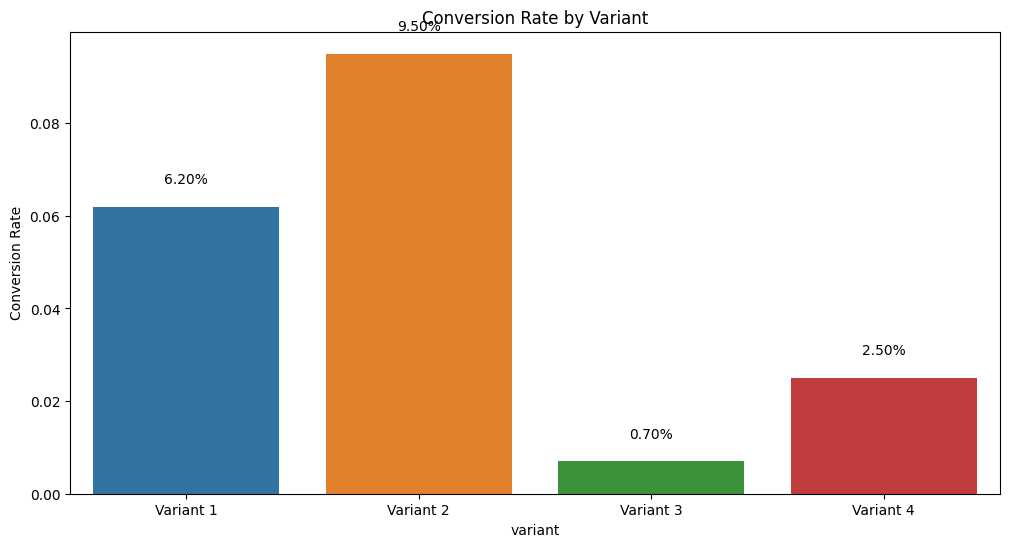

In [8]:
# Example usage for multivariate test
if __name__ == "__main__":
    # Example data from the image (6.2%, 9.5%, 0.7%, 2.5%)
    mv_data = pd.DataFrame({
        'variant': ['Variant 1', 'Variant 2', 'Variant 3', 'Variant 4'],
        'visitors': [1000, 1000, 1000, 1000],
        'conversions': [62, 95, 7, 25]
    })
    
    mv_results = analyze_multivariate_test(mv_data)
    
    print("\nMultivariate Test Results:")
    print(mv_results[['variant', 'conversion_rate', 'relative_uplift', 
                    'p_value', 'is_significant']])
    
    # Visualize results
    plt.figure(figsize=(12, 6))
    sns.barplot(x='variant', y='conversion_rate', data=mv_results)
    plt.title('Conversion Rate by Variant')
    plt.ylabel('Conversion Rate')
    
    # Add conversion rate labels
    for i, rate in enumerate(mv_results['conversion_rate']):
        plt.text(i, rate + 0.005, f"{rate:.2%}", ha='center')
        
    plt.show()